## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
import cv2

from superpac. gradcam import GradCAM

## Load test data and model

In [3]:
X_to_vis = np.load("./split_datasets/test_X_frag_200.npy")
func_model = load_model("./M03")

## Heatmaps

### Generate heatmaps for indices in <code>ix</code>

0.0 2.9086927e-08
0.0 0.74415994


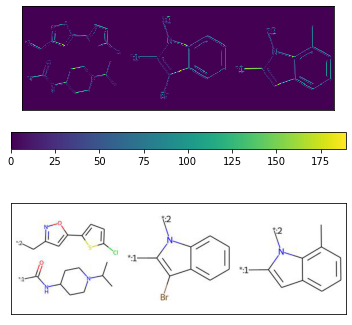

In [26]:
ix = [70]

heatmaps = []
overlaid_heatmaps = []

for ind in ix:
  image = X_to_vis[ind]

  image_input = np.expand_dims(image, axis=0)

  class_score = func_model.predict(image_input) 
  i = np.argmax(class_score[0])

  icam = GradCAM(func_model, i, 'conv2d_3') 

  heatmap = icam.compute_heatmap(image_input)
  overlaid = icam.overlay_heatmap(heatmap, image, alpha=0.2)

  heatmaps.append(heatmap)
  overlaid_heatmaps.append(overlaid)

### Plot heatmaps

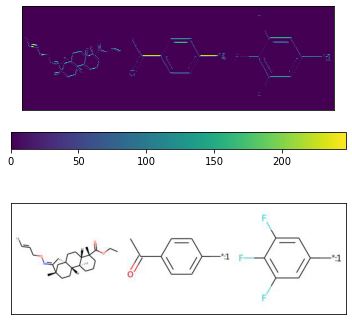

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6,6))

first = ax1.imshow(heatmaps[0], cmap='viridis', interpolation='none')
second = ax2.imshow(image[0], cmap='viridis', interpolation='none')

ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)

plt.imshow(heatmaps[0])
plt.imshow(image)
fig.colorbar(first, ax=ax1, orientation='horizontal')

(-0.5, 599.5, 199.5, -0.5)

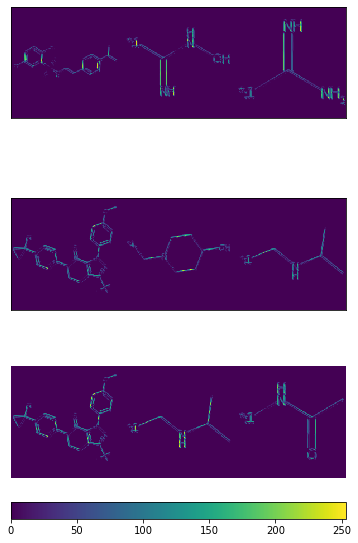

In [215]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(6,10))

ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)

first = ax1.imshow(heatmaps[0], cmap='viridis', interpolation='none')
second = ax2.imshow(heatmaps[1], cmap='viridis', interpolation='none')
third = ax3.imshow(heatmaps[2], cmap='viridis', interpolation='none')

fig.colorbar(third, ax=ax3, orientation='horizontal')
plt.axis('off')



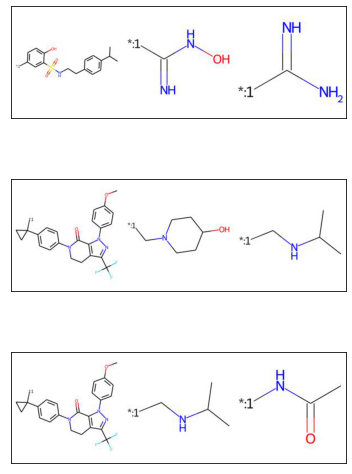

In [219]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(6,9))

ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)

first = ax1.imshow(X_to_vis[ix[0]])
second = ax2.imshow(X_to_vis[ix[1]])
third = ax3.imshow(X_to_vis[ix[2]])
